In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [37]:
master_view = [4000:10000,10000:19000]

2-element Array{UnitRange{Int64},1}:
 4000:10000 
 10000:19000

In [38]:
master_meta_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/annotation/s1a-iw2-slc-vv-20170321t054037-20170321t054102-015786-019fee-005.xml"
master_pod_path = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170410T121606_V20170320T225942_20170322T005942.EOF"
master_data_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw2-slc-vv-20170321t054037-20170321t054102-015786-019fee-005.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw2-slc-vv-20170321t054037-20170321t054102-015786-019fee-005.tiff"

In [39]:
slave_meta_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/annotation/s1a-iw2-slc-vv-20170402t054037-20170402t054102-015961-01a51d-005.xml"
slave_pod_path = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170422T121628_V20170401T225942_20170403T005942.EOF"
slave_data_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/measurement/s1a-iw2-slc-vv-20170402t054037-20170402t054102-015961-01a51d-005.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/measurement/s1a-iw2-slc-vv-20170402t054037-20170402t054102-015961-01a51d-005.tiff"

In [40]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

In [41]:
meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [42]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)   ### bug in footprint
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [43]:
slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[2]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[2]);

In [44]:
master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[2]);

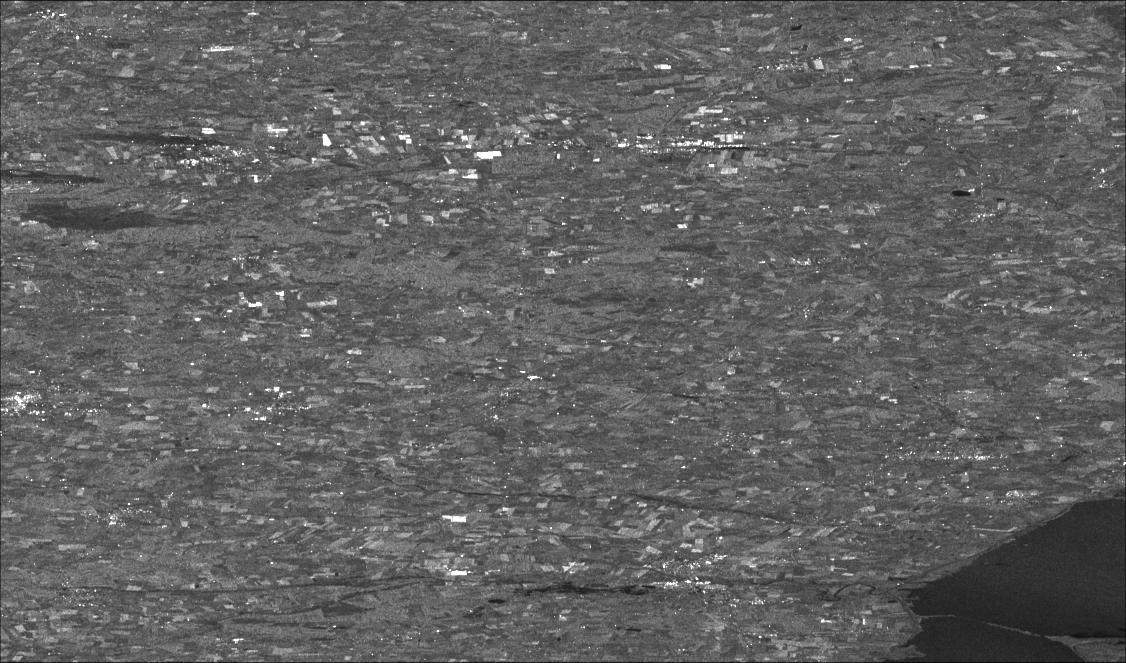

In [45]:
SlcUtil.show_img(master_data)

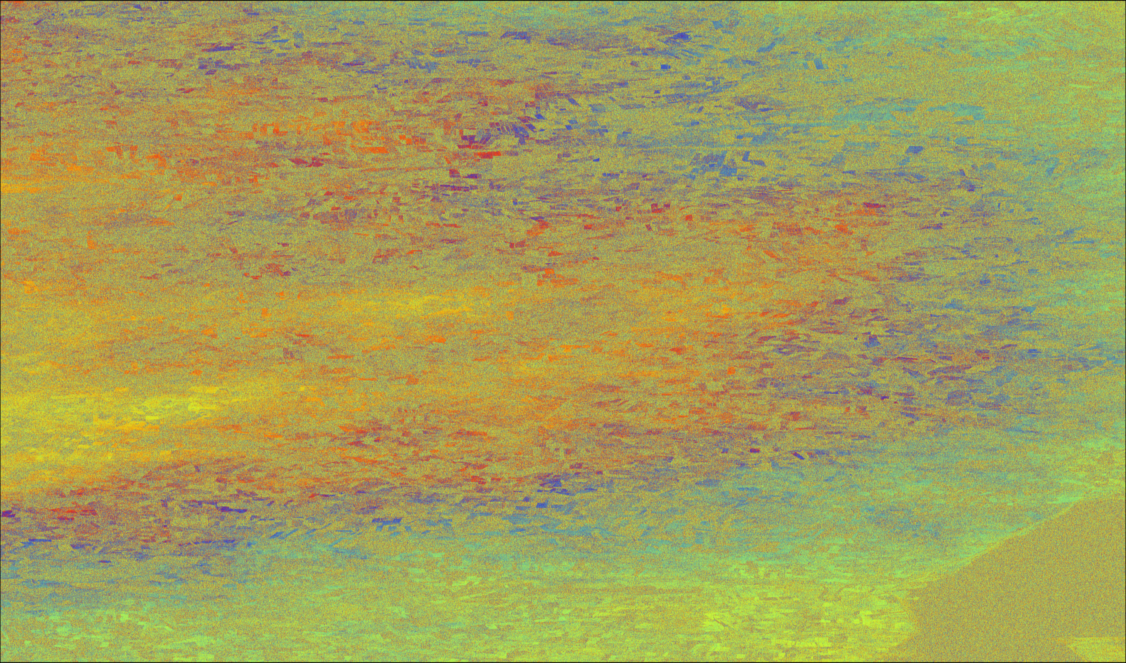

In [46]:
SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat)

In [47]:
SlcUtil._phase_colorbar()

 -π                 -π/2                 0                 π/2                 π


In [48]:
import FileIO
FileIO.save("infero_AA2_mosaic_12days.jpg", SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat))